# BANGALORE HOME PRICE PREDICTION
This is a Data Science Project focussed on Real estate housing price prediction for city Bangalore.

Kaggle Dataset: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data
Libraries used: NumPy, Pandas, Matplotlib.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20,10)

#### Loading the csv Dataset into a dataframe.

In [40]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


#### Printing Some characteristics to know our dataset.

In [41]:
# Shape of the dataframe:
print("1. Shape of our dataset:   ROWS = {}  &  COLUMNS = {} \n".format(df.shape[0],df.shape[1]) )

#Columns of the dataframe
print("2. Columns of our dataset:")
for i in range(0,len(df.columns)):
    print("   --",df.columns[i])

#Counting number of 'Ready To Move' Houses available.
print("\n3. No. of Ready to Move houses: ", df['availability'].value_counts()["Ready To Move"])



1. Shape of our dataset:   ROWS = 13320  &  COLUMNS = 9 

2. Columns of our dataset:
   -- area_type
   -- availability
   -- location
   -- size
   -- society
   -- total_sqft
   -- bath
   -- balcony
   -- price

3. No. of Ready to Move houses:  10581


#### Dropping the features not required for our model

In [42]:
df_new = df.drop(['area_type','society','balcony','availability'],axis='columns')
df_new.shape

(13320, 5)

## Data Cleaning

In [69]:
print("Number of null values in each column:\n\n::ORIGINALLY::")
print(df_new.isnull().sum())

df1 = df_new.dropna()
print("\n::AFTER DROPPING NULL VALUES::")
print(df1.isnull().sum())

df1.shape

Number of null values in each column:

::ORIGINALLY::
location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

::AFTER DROPPING NULL VALUES::
location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64


(13246, 5)

In [90]:
df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))
df1.head()

<ipython-input-90-ec8c34137f0d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['bhk'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [91]:
def find_if_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [98]:
df1[~df1['total_sqft'].apply(find_if_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [99]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [105]:
df2 = df1.copy()
df2.total_sqft = df2.total_sqft.apply(convert_sqft_to_num)
df2 = df2[df2.total_sqft.notnull()]
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [118]:
print("Number of Houses in these sqft ranges:")
ranges = [0,500,1000,1500,2000,5000, 10000, 60000]
sqft_col = df2.total_sqft
sqft_col.groupby(pd.cut(sqft_col, ranges)).count()

Number of Houses in these sqft ranges:


total_sqft
(0, 500]           154
(500, 1000]       1922
(1000, 1500]      6772
(1500, 2000]      2365
(2000, 5000]      1861
(5000, 10000]      103
(10000, 60000]      23
Name: total_sqft, dtype: int64

#### Add new called called "price per square feet"

In [119]:
df3 = df2.copy()
df3["price_per_sqft"] = df3["price"]*100000 / df3["total_sqft"]

In [121]:
df3.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [123]:
#Save this dataframe into a new csv file.

df3.to_csv("bhp_new.csv",index=False)

In [126]:
df3.location = df3.location.apply(lambda x: x.strip())
loc_stats = df3['location'].value_counts()
loc_stats

Whitefield                               533
Sarjapur  Road                           392
Electronic City                          304
Kanakpura Road                           264
Thanisandra                              235
                                        ... 
J.P.nagar 6th Phase.Sarakki Nagar          1
Rajanna Layout                             1
Bidere Agarahara, Behind Safal market      1
K N Extension                              1
Kanakadasa Layout                          1
Name: location, Length: 1287, dtype: int64

In [137]:
#Breaking down these locations into two categories.
print("Total number of locations = ",len(loc_stats))
print(" -- No. of locations with more than 25 houses = ",len(loc_stats[loc_stats>25]))
print(" -- No. of locations with 25 or less houses = ",len(loc_stats[loc_stats<=25]))

Total number of locations =  1287
 -- No. of locations with more than 25 houses =  117
 -- No. of locations with 25 or less houses =  1170


In [141]:
locless = loc_stats[loc_stats<=25]
locmore = loc_stats[loc_stats>25]

In [143]:
# Dimensionality Reduction: 
# If 25 or less houses in a locality, rename locality as other. 

df3.location = df3.location.apply(lambda x: 'other' if x in locless else x)
len(df3.location.unique())
#note unique rows increased from 117 to 118 due to addition of 'other' fields.

118

## Outlier Removal Using Business Logic

In [151]:
#Considering 350 sqft as a minimum requirement for each bedroom.

print(len(df3[df3.total_sqft / df3.bhk < 350]), "houses have bedrooms:sqft skewed ratios. \n[Assuming 350 sqft minimum for each bedroom.]")
(df3[df3.total_sqft / df3.bhk < 350]).head()

1094 houses have bedrooms:sqft skewed ratios. 
[Assuming 350 sqft minimum for each bedroom.]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
26,Electronic City,2 BHK,660.0,1.0,23.1,2,3500.000000
29,Electronic City,3 BHK,1025.0,2.0,47.0,3,4585.365854
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810


In [155]:
df4 = df3[~(df3.total_sqft / df3.bhk < 350)]
df4.shape

(12106, 7)

In [156]:
df4.price_per_sqft.describe()

count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64

In [157]:
# Removing outliers for the feature: Price per Square Feet.

In [159]:
def remove_outliers_pps(df):
    dfout = pd.DataFrame()
    for key,subdf in df4.groupby('location'):
        df_mean = np.mean(subdf.price_per_sqft) 
        df_std = np.std(subdf.price_per_sqft)
        df_reduced = subdf[(subdf.price_per_sqft>=(df_mean-df_std)) & (subdf.price_per_sqft<=(df_mean+df_std))]
        dfout = pd.concat([dfout,df_reduced],ignore_index=True)
    return dfout

df5 = remove_outliers_pps(df4)
df5.shape

(10088, 7)

In [163]:
#See the change in Mean and Std after outlier removal!!
df5.price_per_sqft.describe()

count    10088.000000
mean      5531.251910
std       1995.161512
min       1495.513460
25%       4225.352113
50%       5140.186916
75%       6354.470655
max      21875.000000
Name: price_per_sqft, dtype: float64

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**

{                
'1' : {
    'mean': 4000,
    'std: 2000,
    'count': 34
    },
    
'2' : {
    'mean': 4300,
    'std: 2300,
    'count': 22
    },    
}

**_Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment_**

In [165]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df6 = remove_bhk_outliers(df5)
df6.shape

(6540, 7)

In [167]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,5th Phase JP Nagar,2 BHK,1075.0,2.0,60.0,2,5581.395349
1,5th Phase JP Nagar,2 BHK,1150.0,3.0,52.5,2,4565.217391
2,5th Phase JP Nagar,2 BHK,1256.0,2.0,62.8,2,5000.000000
3,5th Phase JP Nagar,2 BHK,1207.0,2.0,63.0,2,5219.552610
4,5th Phase JP Nagar,3 BHK,1725.0,2.0,100.0,3,5797.101449


Text(0, 0.5, 'Count')

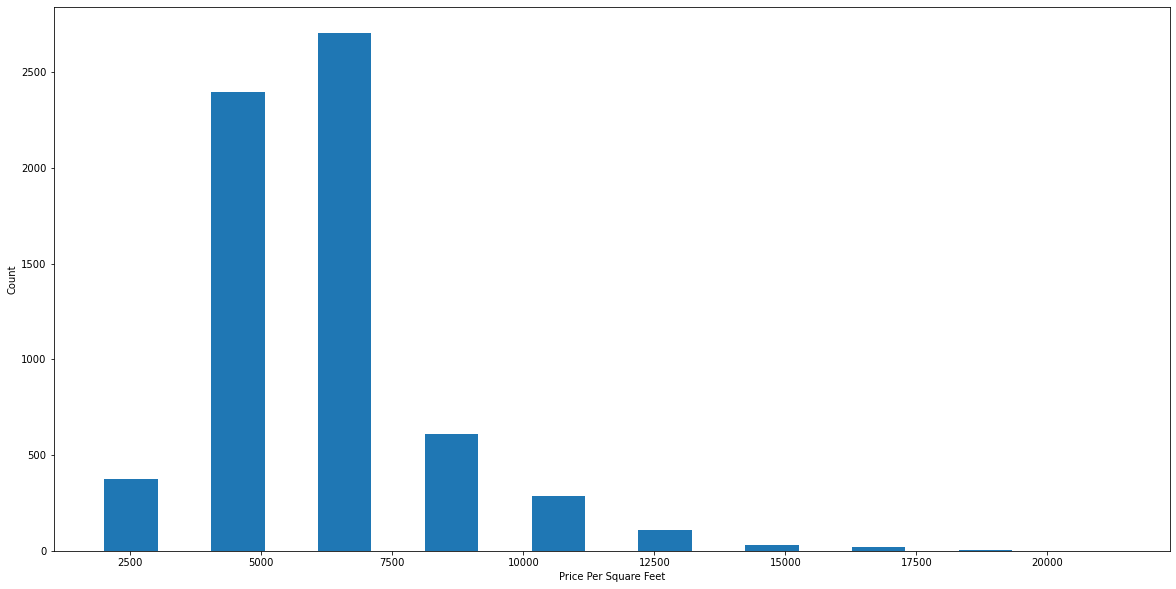

In [169]:
plt.hist(df6.price_per_sqft,rwidth=0.5)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [170]:
dummies = pd.get_dummies(df6.location)
dummies.head(3)

,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Anandapura,Ananth Nagar,Anekal,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
df7 = pd.concat([df6, dummies.drop('other',axis='columns')],axis='columns')
df8 = df7.drop(['location','size'],axis='columns')
df8.head()

,total_sqft,bath,price,bhk,price_per_sqft,5th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Akshaya Nagar,...,Tumkur Road,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,1075.0,2.0,60.0,2,5581.395349,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1150.0,3.0,52.5,2,4565.217391,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1256.0,2.0,62.8,2,5000.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1207.0,2.0,63.0,2,5219.552610,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1725.0,2.0,100.0,3,5797.101449,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building the Model for prediction now.

In [187]:
df8.to_csv("bhp_new.csv",index=False)

In [188]:
X = df8.drop(['price'],axis='columns')
y = df8.price

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [193]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print("Accuracy = ",round(model.score(X_test,y_test)*100,2), "%.")

Accuracy =  85.9 %.


In [194]:
import pickle
with open('bhp_model.pickle','wb') as f:
    pickle.dump(model,f)

In [195]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))